# Forest Cover Type Classification

## Imports

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
df = pd.read_csv("../dataset/covtype.data.gz", compression="gzip", header=None)

columns = [
    "Elevation", "Aspect", "Slope", 
    "Horizontal_Distance_To_Hydrology", 
    "Vertical_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Roadways", 
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
    "Horizontal_Distance_To_Fire_Points"
]

# 4 Wilderness Area columns (binary)
columns += [f"Wilderness_Area{i}" for i in range(1, 5)]

# 40 Soil Type columns (binary)
columns += [f"Soil_Type{i}" for i in range(1, 41)]

# Target
columns += ["Cover_Type"]

df.columns = columns

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.shape

(581012, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
# changing the classes from 1 -> 7 to 0 -> 6
df['Cover_Type'] = df['Cover_Type'] - 1

In [9]:
df['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

In [10]:
# Features
X = df.drop(columns=['Cover_Type']).copy()
# Target
y = df['Cover_Type'].copy()

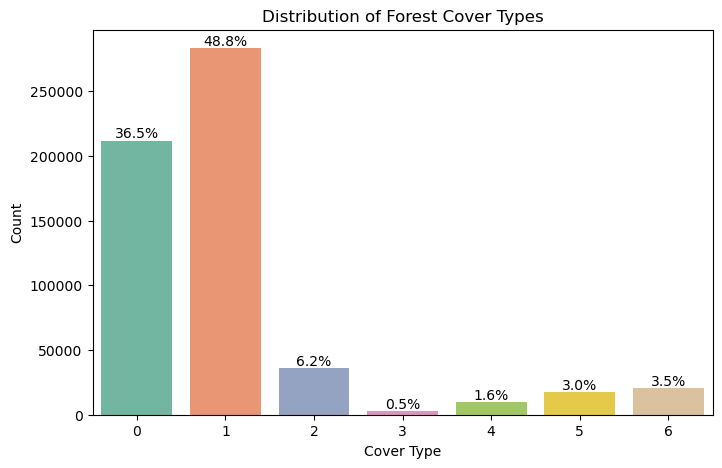

In [11]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")

# Add percentages on bars
total = len(y)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10)

plt.show()

we see that the data is imbalanced in the target variable which will cause bias towards a certain class [cover type]

## Model Training [without resampling]

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scale the Features for Training

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model

In [15]:
logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.7228815090832422

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     42368
           1       0.75      0.80      0.77     56661
           2       0.67      0.80      0.73      7151
           3       0.57      0.38      0.46       549
           4       0.13      0.00      0.01      1899
           5       0.49      0.26      0.34      3473
           6       0.73      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.58      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203



The accuracy of LogisticRegression model is nearly 72%, which is considered a relatively good accuracy, but see what happens when we visualize our confusion matrix.

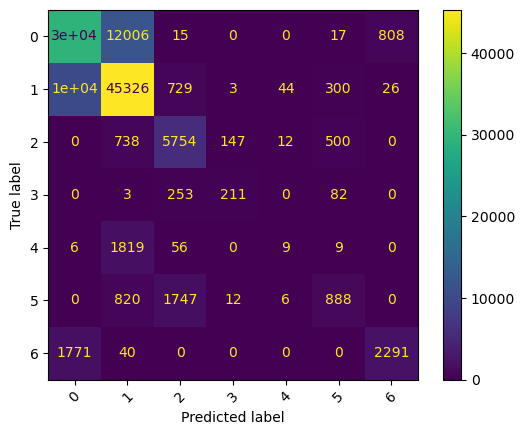

In [16]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

The confusion matrix shows an obvious bias in predicting our target variable towards 2 classes, which are 1 and 2
and that actually happens because of the Imbalanced data that we have.

## Training [with Oversampling]

In [17]:
oversampled_df = df.copy()

In [18]:
oversampled_df['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

To do oversampling, we must maximize the size of our classes to the maximum one.

In [19]:
max_class_size = oversampled_df['Cover_Type'].value_counts().max()

In [20]:
# oversampling the minority classes
oversampled_df = oversampled_df.groupby('Cover_Type').apply(lambda x: x.sample(max_class_size, replace=True, random_state=42)).reset_index(drop=True)

oversampled_df['Cover_Type'].value_counts()

Cover_Type
0    283301
1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
Name: count, dtype: int64

In [21]:
oversampled_X = oversampled_df.drop(columns=['Cover_Type']).copy()
oversampled_y = oversampled_df['Cover_Type'].copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    oversampled_X, oversampled_y, test_size=0.2, random_state=42, stratify=oversampled_y
)

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
oversampled_logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
oversampled_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = oversampled_logreg.predict(X_test_scaled)

print("=== Logistic Regression on Oversampled Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression on Oversampled Data ===
Accuracy: 0.7066022560523622

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     56660
           1       0.61      0.52      0.56     56660
           2       0.63      0.55      0.59     56660
           3       0.81      0.88      0.84     56661
           4       0.72      0.78      0.75     56660
           5       0.61      0.66      0.64     56660
           6       0.88      0.89      0.88     56661

    accuracy                           0.71    396622
   macro avg       0.70      0.71      0.70    396622
weighted avg       0.70      0.71      0.70    396622



The accuracy is less than the previous one but still reasonable.

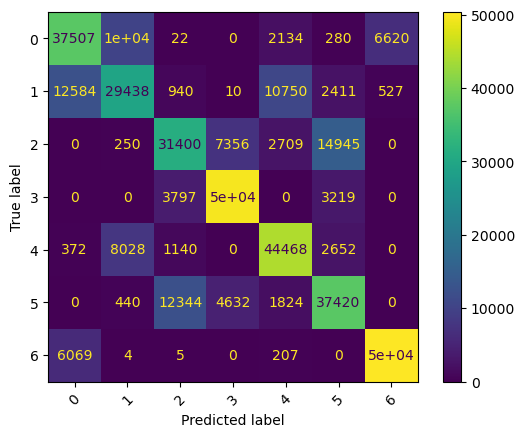

In [25]:
ConfusionMatrixDisplay.from_estimator(oversampled_logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

It prefroms better on certain classes, which have high f1 score in the classification report.

## Training [with Undersampling]

In [26]:
undersampled_df = df.copy()

In [27]:
undersampled_df['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

To do undersampling, all the classes should have the number of instances as the least class of them which is class 4 in our case with 2747 rows.

In [28]:
min_class_size = undersampled_df['Cover_Type'].value_counts().min()

In [29]:
# undersampling the majority classes
undersampled_df = undersampled_df.groupby('Cover_Type').apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)

undersampled_df['Cover_Type'].value_counts()

Cover_Type
0    2747
1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
Name: count, dtype: int64

In [30]:
undersampled_X = undersampled_df.drop(columns=['Cover_Type']).copy()
undersampled_y = undersampled_df['Cover_Type'].copy()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_X, undersampled_y, test_size=0.2, random_state=42, stratify=undersampled_y
)

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
undersampled_logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
undersampled_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = undersampled_logreg.predict(X_test_scaled)

print("=== Logistic Regression on Undersampled Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression on Undersampled Data ===
Accuracy: 0.6861674466978679

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65       549
           1       0.58      0.48      0.53       549
           2       0.61      0.52      0.56       549
           3       0.79      0.86      0.82       550
           4       0.69      0.77      0.73       550
           5       0.60      0.65      0.62       549
           6       0.88      0.86      0.87       550

    accuracy                           0.69      3846
   macro avg       0.68      0.69      0.68      3846
weighted avg       0.68      0.69      0.68      3846



Accuracy is very similar to oversampling, but it is way better in the running time and this is reasonable seeing how much data differs in the training process.

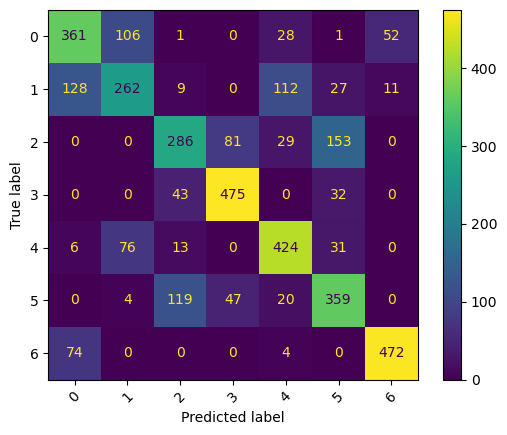

In [34]:
ConfusionMatrixDisplay.from_estimator(undersampled_logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

The confusion matrix is more reasonable here that the model predicts all the classes.

## Training other Models on the Undersampled dataset

### Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8575143005720229

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       549
           1       0.80      0.65      0.72       549
           2       0.87      0.81      0.84       549
           3       0.92      0.98      0.95       550
           4       0.88      0.95      0.92       550
           5       0.82      0.87      0.84       549
           6       0.94      0.96      0.95       550

    accuracy                           0.86      3846
   macro avg       0.86      0.86      0.85      3846
weighted avg       0.86      0.86      0.85      3846



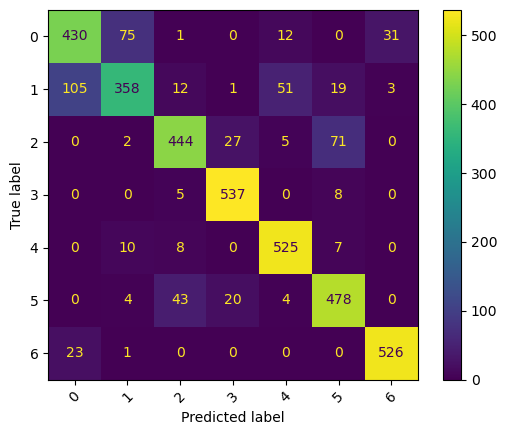

In [36]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

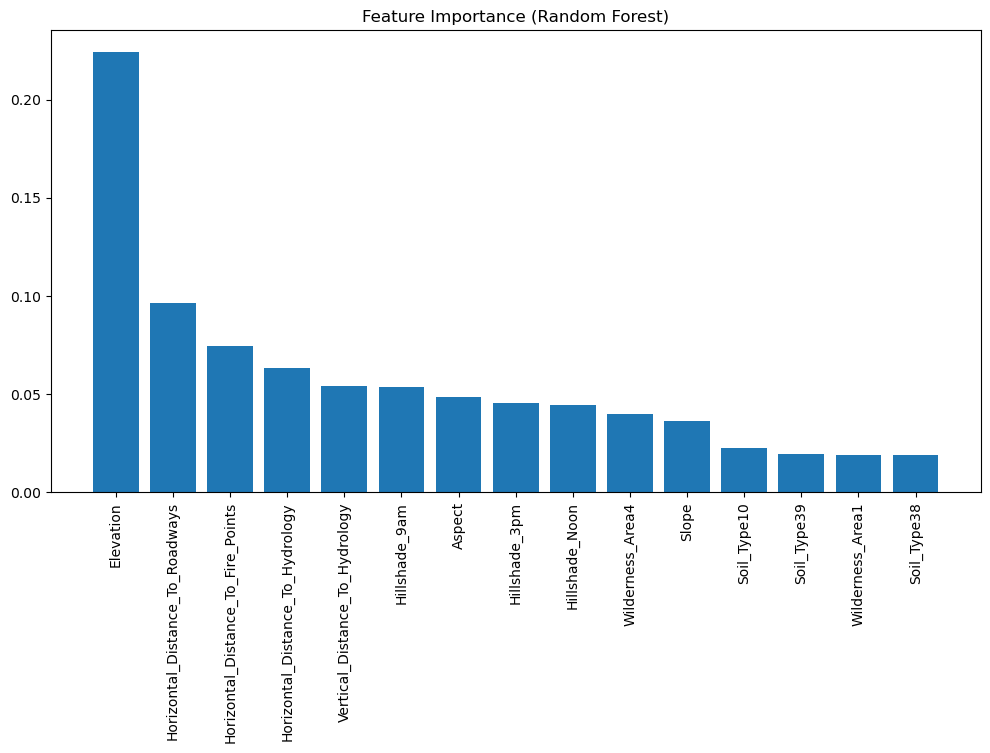

In [37]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), X.columns[indices[:15]], rotation=90)
plt.show()

### XGBoost

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=7,
    eval_metric="mlogloss",
    random_state=42,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1
)

xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8653146125845034
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       549
           1       0.78      0.68      0.73       549
           2       0.88      0.82      0.85       549
           3       0.94      0.98      0.96       550
           4       0.89      0.96      0.92       550
           5       0.83      0.88      0.86       549
           6       0.94      0.96      0.95       550

    accuracy                           0.87      3846
   macro avg       0.86      0.87      0.86      3846
weighted avg       0.86      0.87      0.86      3846



Better Accuracy than Random Forest.

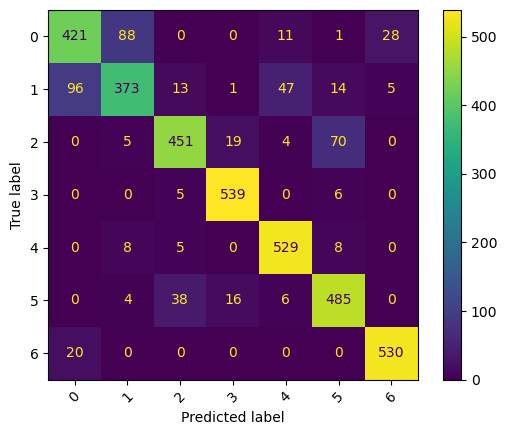

In [40]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

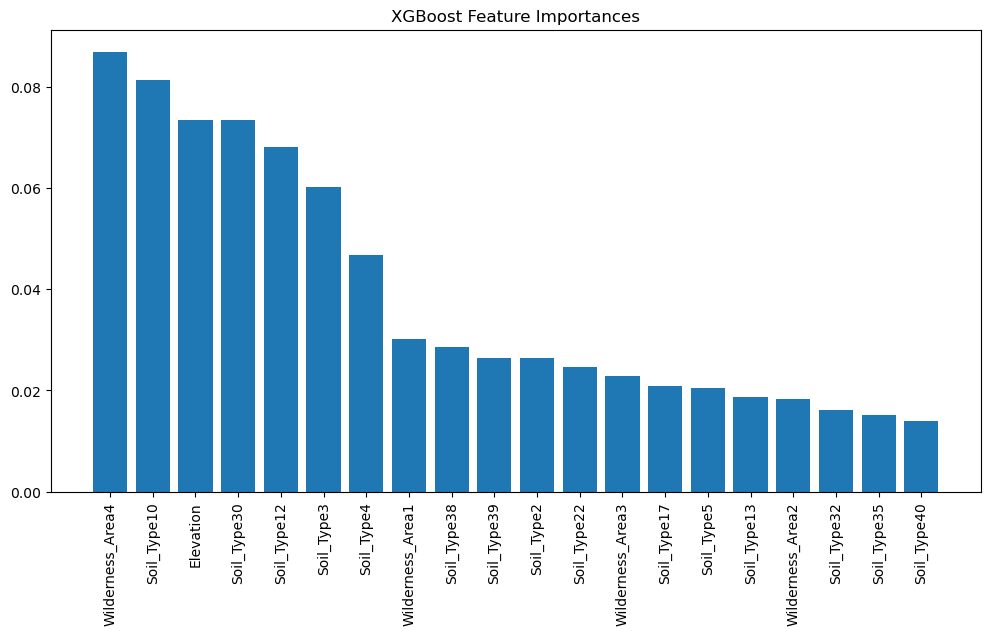

In [41]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("XGBoost Feature Importances")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.show()